In [562]:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True
# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# import the KNNimputer class
from sklearn.impute import KNNImputer


# Data preprossesing

## Understand the data

In [472]:
survey_df = pd.read_csv("survey_data.csv")
usage_df=pd.read_csv("survey_users_app_usage.csv")

In [473]:
survey_df.dtypes

user_id                                 object
age                                     object
annual_income                           object
country                                 object
duolingo_platform                       object
duolingo_subscriber                     object
duolingo_usage                          object
employment_status                       object
future_contact                          object
gender                                  object
other_resources                         object
primary_language_commitment             object
primary_language_review                 object
primary_language_motivation             object
primary_language_motivation_followup    object
primary_language_proficiency            object
student                                 object
survey_complete                          int64
time_spent_seconds                       int64
dtype: object

In [474]:
survey_df.head(5)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Stories/novels/children's books,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I like to learn new languages,"I want to learn as many languages as I can,Oth...",Advanced,Not currently a student,1,193
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am a refugee",Intermediate,Not currently a student,1,139
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I want to connect with my heritage or identity,NaN,Beginner,Not currently a student,1,119
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,NaN,Intermediate,Not currently a student,1,157


In [475]:
survey_df["user_id"].nunique()

6150

In [476]:
usage_df.head(5)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
0,35cb7e8f72c911e9888edca9049399ef,1/10/22 21:14,NaN,46.0,True,False,277.0,88,741.0,668.0,135,137,NaN
1,35ca34fd72c911e99ed6dca9049399ef,2/28/21 5:01,NaN,50.0,True,False,62.0,16,57.0,57.0,6,453,NaN
2,35d1a54a72c911e98e25dca9049399ef,5/7/18 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481,NaN
3,35d4beb072c911e9aa92dca9049399ef,4/27/22 9:28,NaN,2.0,False,False,2.0,3,6.0,5.0,1,30,NaN
4,35ccf4bd72c911e9be2edca9049399ef,4/9/19 3:16,NaN,34.0,False,False,216.0,57,338.0,297.0,56,1144,NaN


In [477]:
usage_df.dtypes

user_id                     object
duolingo_start_date         object
daily_goal                 float64
highest_course_progress    float64
took_placement_test         object
purchased_subscription        bool
highest_crown_count        float64
n_active_days                int64
n_lessons_started          float64
n_lessons_completed        float64
longest_streak               int64
n_days_on_platform           int64
Unnamed: 12                float64
dtype: object

In [478]:
usage_df.shape

(6149, 13)

In [479]:
#merge datasets by user ID
df = pd.merge(survey_df, usage_df, on="user_id") 

In [480]:
df.head(10)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,...,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,58.0,True,False,275.0,91,232.0,232.0,589,849,NaN
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,...,4.0,True,False,22.0,54,90.0,88.0,27,125,NaN
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,11.0,False,True,17.0,30,49.0,47.0,30,479,NaN
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,...,11.0,False,True,55.0,93,1161.0,1028.0,40,117,NaN
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,64.0,False,True,417.0,85,215.0,252.0,266,1951,NaN
5,35ca00d772c911e992e8dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed part-time,Yes,Male,...,10.0,False,False,19.0,9,20.0,8.0,2,356,NaN
6,35ca018c72c911e9a63cdca9049399ef,Under 18,"$0 - $10,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Unemployed,Yes,Female,...,4.0,False,False,19.0,27,137.0,131.0,26,30,NaN
7,35ca023572c911e99fa5dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,...,7.0,False,True,28.0,20,181.0,179.0,20,19,NaN
8,35ca02de72c911e9a3bfdca9049399ef,18-34,"$76,000 - $150,000",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,No,Male,...,64.0,True,True,454.0,93,262.0,246.0,697,772,NaN
9,35ca038a72c911e9bc47dca9049399ef,35 - 54,NaN,JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Monthly,Employed full-time,No,Female,...,57.0,False,False,210.0,35,77.0,69.0,14,967,NaN


In [481]:
df.shape

(6151, 31)

In [482]:
df.head(5)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,...,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,58.0,True,False,275.0,91,232.0,232.0,589,849,NaN
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,...,4.0,True,False,22.0,54,90.0,88.0,27,125,NaN
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,11.0,False,True,17.0,30,49.0,47.0,30,479,NaN
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,...,11.0,False,True,55.0,93,1161.0,1028.0,40,117,NaN
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,...,64.0,False,True,417.0,85,215.0,252.0,266,1951,NaN


## Handle outlier data

In [483]:
#replace outliers in "n_active_days"
df.loc[df['n_active_days'] > 97, 'n_active_days'] = 97

In [484]:
#remove outliers in "longest_streak"
df = df[(df['longest_streak'] <= 4000)]
#log transformation of skewed variable
df['log_streak'] = np.log(df['longest_streak'] + 1)

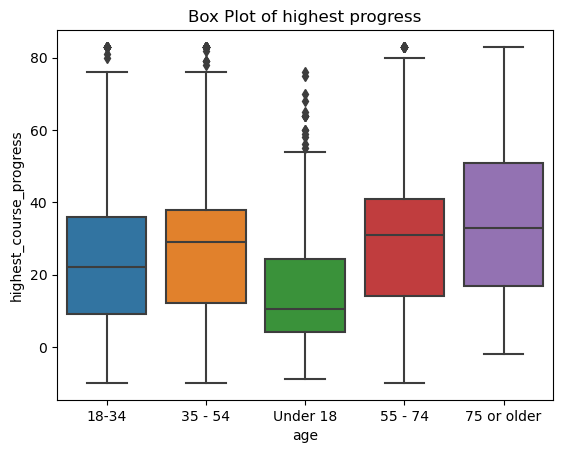

In [485]:
# detecting outliers using boxplot
sns.boxplot(x='age', y='highest_course_progress', data=df)
plt.title('Box Plot of highest progress')
plt.show()
#remove negative-value in highest_course_progress
df = df[(df['highest_course_progress'] >= 0)]

<Axes: xlabel='age', ylabel='log_progress'>

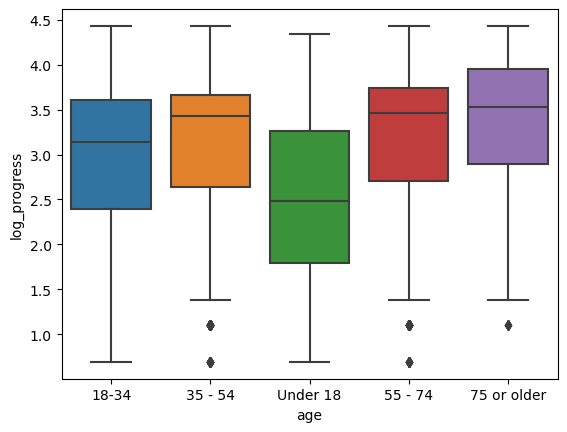

In [487]:
#log transformation of skewed variable
df['log_progress'] = np.log(df['highest_course_progress'] + 1)
sns.boxplot(x='age', y='log_progress', data=df)

In [488]:
# remove a variable redundant to "n_days_on_platform"
df.drop("duolingo_start_date",axis=1,inplace=True)

## Handle missing data

In [489]:
# Count missing data by feature
df.isnull().sum()

user_id                                    0
age                                      342
annual_income                            981
country                                    0
duolingo_platform                        271
duolingo_subscriber                      280
duolingo_usage                           270
employment_status                        446
future_contact                           719
gender                                   342
other_resources                         1663
primary_language_commitment              162
primary_language_review                  168
primary_language_motivation              233
primary_language_motivation_followup    2391
primary_language_proficiency             157
student                                  648
survey_complete                            0
time_spent_seconds                         0
daily_goal                              3367
highest_course_progress                    0
took_placement_test                        0
purchased_

In [490]:
#drop colummns with more than 1/3 values missing
df.drop(["daily_goal","primary_language_motivation_followup","Unnamed: 12"],axis=1,inplace=True)

In [491]:
# Create a new variable indicating if any entry in the row is missing
df['has_missing'] = df.isnull().any(axis=1).astype(int)
df.isnull().sum()


user_id                            0
age                              342
annual_income                    981
country                            0
duolingo_platform                271
duolingo_subscriber              280
duolingo_usage                   270
employment_status                446
future_contact                   719
gender                           342
other_resources                 1663
primary_language_commitment      162
primary_language_review          168
primary_language_motivation      233
primary_language_proficiency     157
student                          648
survey_complete                    0
time_spent_seconds                 0
highest_course_progress            0
took_placement_test                0
purchased_subscription             0
highest_crown_count              270
n_active_days                      0
n_lessons_started                141
n_lessons_completed              141
longest_streak                     0
n_days_on_platform                 0
l

### Imputation by K-nearest neigbours
Note that to better perform KNN imputation I encoded catogorical variables and scaled numerical features here(instead of in the section of feature engineering).

In [492]:
# feature selection
features=["user_id","age","annual_income","country","duolingo_platform","duolingo_subscriber","duolingo_usage","employment_status","gender","other_resources","primary_language_motivation","primary_language_commitment","primary_language_proficiency","primary_language_review","student","log_progress","n_active_days","n_lessons_started","n_lessons_completed","log_streak","n_days_on_platform"]

In [493]:
new_data=df[features].copy()

In [494]:
#ad-hoc feature engineering: if no response in "other resources", treat as if duolingo is his only resource for learning language
new_data['only_resource'] = new_data['other_resources'].isnull().astype(int)
new_data.drop("other_resources",axis=1,inplace=True)

### Scaling numerical features

In [495]:
scaler = MinMaxScaler()
num_features=["log_progress","n_active_days","log_streak","n_days_on_platform"]
new_data[num_features] = scaler.fit_transform(new_data[num_features])

In [496]:
new_data.head(5)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,gender,primary_language_motivation,...,primary_language_proficiency,primary_language_review,student,log_progress,n_active_days,n_lessons_started,n_lessons_completed,log_streak,n_days_on_platform,only_resource
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Male,I like to learn new languages,...,Advanced,I am using Duolingo to review a language I've ...,Not currently a student,0.905481,0.937500,232.0,232.0,0.849874,0.352917,0
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Male,I need to be able to speak the local language ...,...,Intermediate,I am using Duolingo to review a language I've ...,Not currently a student,0.245150,0.552083,90.0,88.0,0.443871,0.051250,1
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I want to connect with my heritage or identity,...,Beginner,I am using Duolingo to review a language I've ...,Not currently a student,0.479379,0.302083,49.0,47.0,0.457429,0.198750,1
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Female,I am preparing for a trip,...,Intermediate,I am using Duolingo to learn this language for...,Not currently a student,0.479379,0.958333,1161.0,1028.0,0.494672,0.047917,0
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I want to connect with my heritage or identity,...,Intermediate,I am using Duolingo to learn this language for...,Not currently a student,0.931393,0.875000,215.0,252.0,0.744258,0.812083,1


### Encoding categorical features 

In [497]:
# Ordinal encoding for ordinal catogorical features
# Define the order for the ordinal categories
age_mapping = {"Under 18":0,"18-34":1,"35-54":2,"55-74":2,"75 or older":3}
income_mapping = {'$0 - $10,000': 0,'$11,000 - $25,000' : 1, '$26,000 - $75,000': 2,'$76,000 - $150,000': 3,'$151,000 or more':4}
commitment_mapping = {"I'm not at all committed to learning this language.":0,"I'm slightly committed to learning this language.": 1,  "I'm moderately committed to learning this language.": 2, "I'm very committed to learning this language.": 3,"I'm extremely committed to learning this language.":4}
proficiency_mapping={"Beginner":0,"Intermediate":1,"Advanced":2}

# Apply the mapping to encode the ordinal features
new_data["age"]=new_data["age"].map(age_mapping)
new_data['annual_income'] = new_data['annual_income'].map(income_mapping)
new_data['primary_language_commitment'] = new_data['primary_language_commitment'].map(commitment_mapping)
new_data["primary_language_proficiency"]=new_data['primary_language_proficiency'].map(proficiency_mapping)

In [498]:
new_data.head(5)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,gender,primary_language_motivation,...,primary_language_proficiency,primary_language_review,student,log_progress,n_active_days,n_lessons_started,n_lessons_completed,log_streak,n_days_on_platform,only_resource
0,35c9fc6e72c911e99681dca9049399ef,1.0,2.0,JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Male,I like to learn new languages,...,2.0,I am using Duolingo to review a language I've ...,Not currently a student,0.905481,0.937500,232.0,232.0,0.849874,0.352917,0
1,35c9fdde72c911e98630dca9049399ef,1.0,2.0,JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Male,I need to be able to speak the local language ...,...,1.0,I am using Duolingo to review a language I've ...,Not currently a student,0.245150,0.552083,90.0,88.0,0.443871,0.051250,1
2,35c9feb072c911e9ab4cdca9049399ef,1.0,3.0,JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I want to connect with my heritage or identity,...,0.0,I am using Duolingo to review a language I've ...,Not currently a student,0.479379,0.302083,49.0,47.0,0.457429,0.198750,1
3,35c9ff7072c911e9900ddca9049399ef,1.0,3.0,JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Female,I am preparing for a trip,...,1.0,I am using Duolingo to learn this language for...,Not currently a student,0.479379,0.958333,1161.0,1028.0,0.494672,0.047917,0
4,35ca002672c911e99effdca9049399ef,NaN,3.0,JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Male,I want to connect with my heritage or identity,...,1.0,I am using Duolingo to learn this language for...,Not currently a student,0.931393,0.875000,215.0,252.0,0.744258,0.812083,1


In [ ]:
#ad-hoc feature engineering: Manually group motivation categories
print(df["primary_language_motivation"].unique())

In [540]:
grouping = {

'I like to learn new languages':"Intrinsic",
 'I need to be able to speak the local language where I live':'Extrinsic',
 'I want to connect with my heritage or identity':'Intrinsic',
 'I am preparing for a trip':"Extrinsic",
    'I want to use my time more productively':"Intrinsic",
 'I want to challenge myself':"Intrinsic",
 'I want my family to learn a language together':"Intrinsic",
 'I want to improve relationships with some of the people in my life':"Extrinsic",
 'I am interested in a culture that speaks this language':"Intrinsic",
 'I want to advance professionally or economically':"Intrinsic",
 'I need to learn this language for school':"Extrinsic",
 'I want to keep my brain healthy':"Intrinsic",
 "I don't want to forget what I've previously learned": 'Intrinsic'}
# Apply the grouping
new_data['primary_language_motivation'] = df['primary_language_motivation'].map(grouping)

In [541]:
# One-hot encoding for nominal catogorical features
nominal_features=["gender","student","employment_status","country","duolingo_platform","duolingo_subscriber","primary_language_review","duolingo_usage","primary_language_motivation"]
df_encoded = pd.get_dummies(new_data, columns=nominal_features)

In [542]:
df_encoded.head(5)

,user_id,age,annual_income,primary_language_commitment,primary_language_proficiency,log_progress,n_active_days,n_lessons_started,n_lessons_completed,log_streak,...,"duolingo_subscriber_Yes, I currently pay for Duolingo Plus",primary_language_review_I am using Duolingo to learn this language for the first time.,primary_language_review_I am using Duolingo to review a language I've studied before.,duolingo_usage_Daily,duolingo_usage_I don't use Duolingo,duolingo_usage_Less than once a month,duolingo_usage_Monthly,duolingo_usage_Weekly,primary_language_motivation_Extrinsic,primary_language_motivation_Intrinsic
0,35c9fc6e72c911e99681dca9049399ef,1.0,2.0,3.0,2.0,0.905481,0.937500,232.0,232.0,0.849874,...,False,False,True,True,False,False,False,False,False,True
1,35c9fdde72c911e98630dca9049399ef,1.0,2.0,1.0,1.0,0.245150,0.552083,90.0,88.0,0.443871,...,False,False,True,False,False,False,False,True,True,False
2,35c9feb072c911e9ab4cdca9049399ef,1.0,3.0,2.0,0.0,0.479379,0.302083,49.0,47.0,0.457429,...,True,False,True,True,False,False,False,False,False,True
3,35c9ff7072c911e9900ddca9049399ef,1.0,3.0,3.0,1.0,0.479379,0.958333,1161.0,1028.0,0.494672,...,False,True,False,True,False,False,False,False,True,False
4,35ca002672c911e99effdca9049399ef,NaN,3.0,3.0,1.0,0.931393,0.875000,215.0,252.0,0.744258,...,True,True,False,True,False,False,False,False,False,True


In [543]:
# Apply KNN imputation
## Separate the 'user_id' column
user_ids = df_encoded["user_id"]  # Store the UserID column
df_features = df_encoded.drop(columns=['user_id'])  # Drop the UserID for KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_features),columns=df_features.columns)
## Reattach the 'UserID' column
df_imputed['UserID'] = user_ids
df_imputed.describe()

,age,annual_income,primary_language_commitment,primary_language_proficiency,log_progress,n_active_days,n_lessons_started,n_lessons_completed,log_streak,n_days_on_platform,...,"duolingo_subscriber_Yes, I currently pay for Duolingo Plus",primary_language_review_I am using Duolingo to learn this language for the first time.,primary_language_review_I am using Duolingo to review a language I've studied before.,duolingo_usage_Daily,duolingo_usage_I don't use Duolingo,duolingo_usage_Less than once a month,duolingo_usage_Monthly,duolingo_usage_Weekly,primary_language_motivation_Extrinsic,primary_language_motivation_Intrinsic
count,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,...,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000,5984.000000
mean,1.049465,1.286564,2.526337,0.530582,0.627711,0.487491,246.384860,230.069753,0.399389,0.255795,...,0.265541,0.491143,0.480782,0.702874,0.004846,0.027574,0.047627,0.171959,0.350267,0.610795
std,0.448519,1.150605,0.923865,0.600318,0.240752,0.364784,296.293148,279.279086,0.248793,0.247996,...,0.441658,0.499963,0.499672,0.457031,0.069452,0.163761,0.212994,0.377376,0.477093,0.487611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.479379,0.114583,53.000000,47.000000,0.184663,0.040833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,0.000000,0.706070,0.458333,161.000000,146.500000,0.377402,0.172917,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.200000,2.000000,3.000000,1.000000,0.794724,0.875000,329.250000,307.000000,0.591790,0.417083,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,3902.000000,3880.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Pre-clustering Exploratory

<Axes: xlabel='student', ylabel='count'>

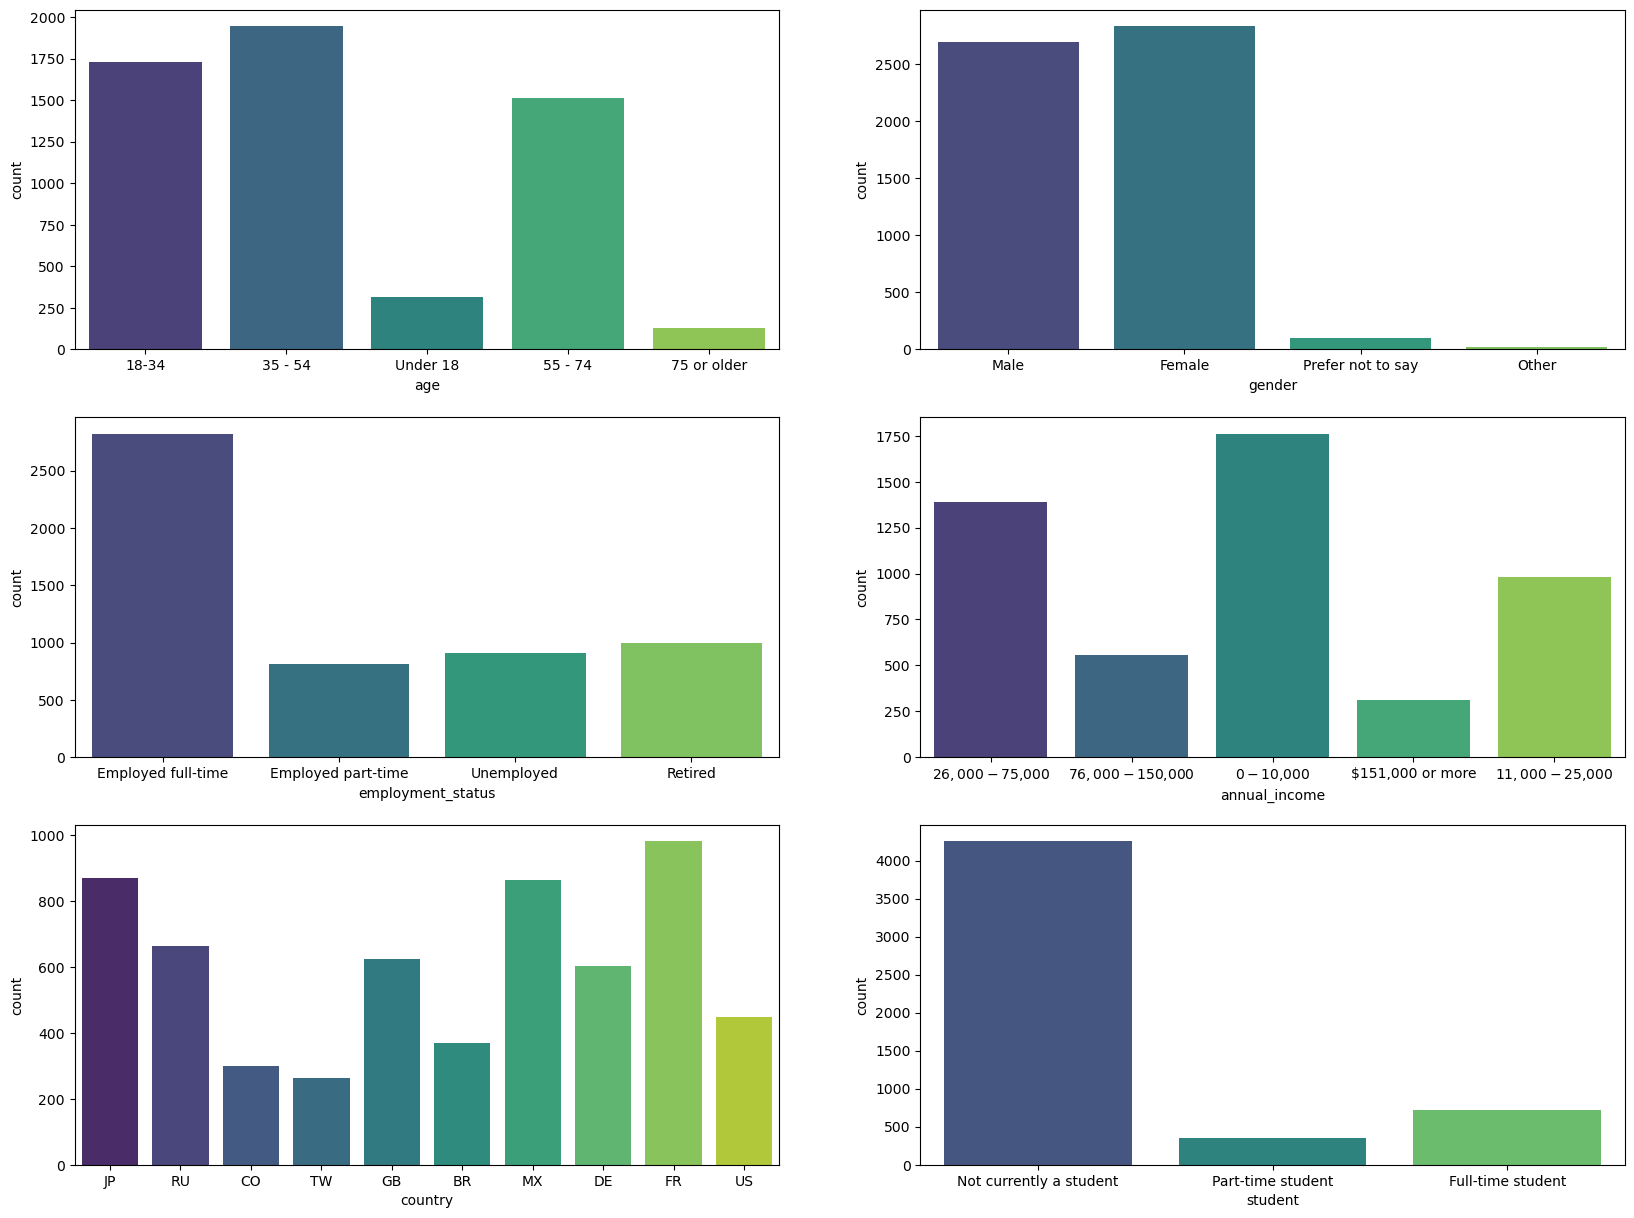

In [544]:
# Plot box plot of Demographic Features
fig,axs=plt.subplots(3,2,figsize=(20,15))

sns.countplot(x='age', data=df, ax=axs[0,0],palette='viridis')

sns.countplot(x='gender', data=df, ax=axs[0,1],palette='viridis')

sns.countplot(x='employment_status', data=df, ax=axs[1,0],palette='viridis')

sns.countplot(x='annual_income', data=df, ax=axs[1,1],palette='viridis')

sns.countplot(x='country', data=df, ax=axs[2,0],palette='viridis')

sns.countplot(x='student', data=df, ax=axs[2,1],palette='viridis')


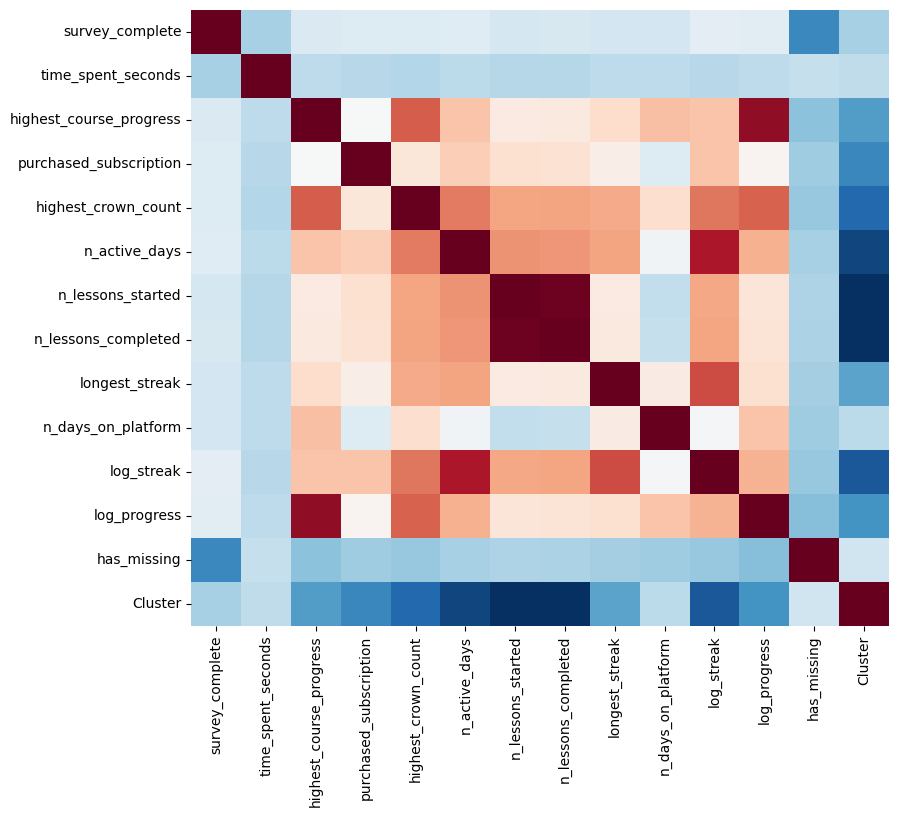

In [546]:
#correlation between features
correlations = df.corr(numeric_only=True)
# Make the figsize 9 x 8
plt.figure(figsize=(9,8))
# Plot heatmap of correlations
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            fmt='.0f',
            cbar=False)
plt.show()


## Feature Engineering

In [547]:
## create a new feature: complete/start ratio
df_imputed["completion/start"]=df_imputed.n_lessons_completed/df_imputed.n_lessons_started

# User Segmentation Analysis

In [548]:
## Set optimal number of clusters

In [549]:
df_imputed.isnull().sum()

age                                                                                         0
annual_income                                                                               0
primary_language_commitment                                                                 0
primary_language_proficiency                                                                0
log_progress                                                                                0
n_active_days                                                                               0
n_lessons_started                                                                           0
n_lessons_completed                                                                         0
log_streak                                                                                  0
n_days_on_platform                                                                          0
only_resource                                               

In [565]:
# List to store WCSS values for different numbers of clusters
wcss = []
silhouette=[]

# Compute K-means for different values of k (number of clusters)
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init="auto")
    kmeans.fit(df_imputed.drop(columns=['UserID']))
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS
    silhouette.append(silhouette_score(df_imputed.drop(columns=['UserID']),kmeans.labels_))

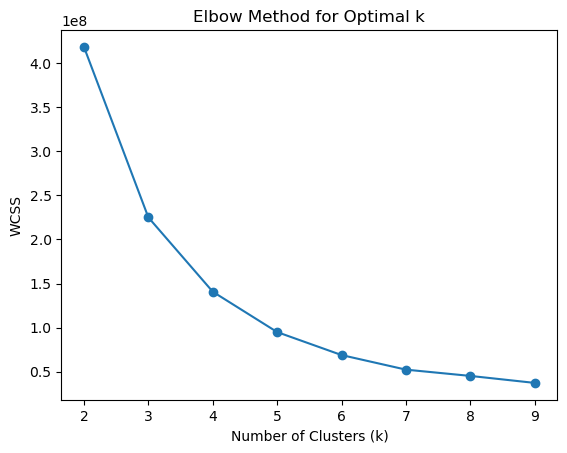

In [566]:
# Plot the WCSS values against k
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

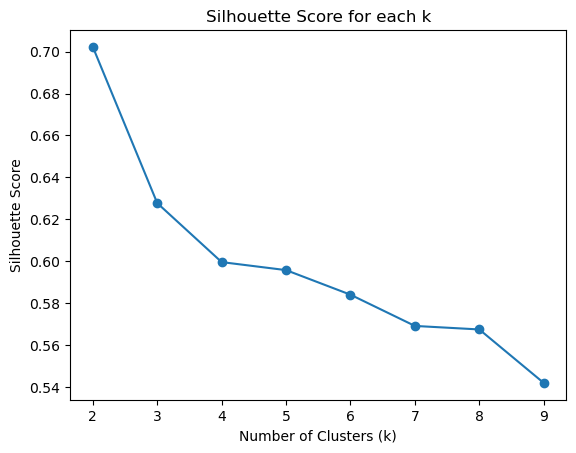

In [568]:
# Plot the sihouette scores against k
plt.plot(range(2, 10), silhouette, marker='o')
plt.title('Silhouette Score for each k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Both 3 and 4 seem to be feasible choices for K, per the elbow graph shows.
I decided to choose 3 since it has a higher sihouette score.

## Applying K-means algorithm

In [552]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3,random_state=15,n_init=10)
clusters = kmeans.fit_predict(df_imputed.drop(columns=['UserID']))
# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters
df_imputed["Cluster"]=clusters
new_data["Cluster"]=clusters

## Comparison between clusters


### Comparision of basic demographics

<Axes: xlabel='Cluster', ylabel='count'>

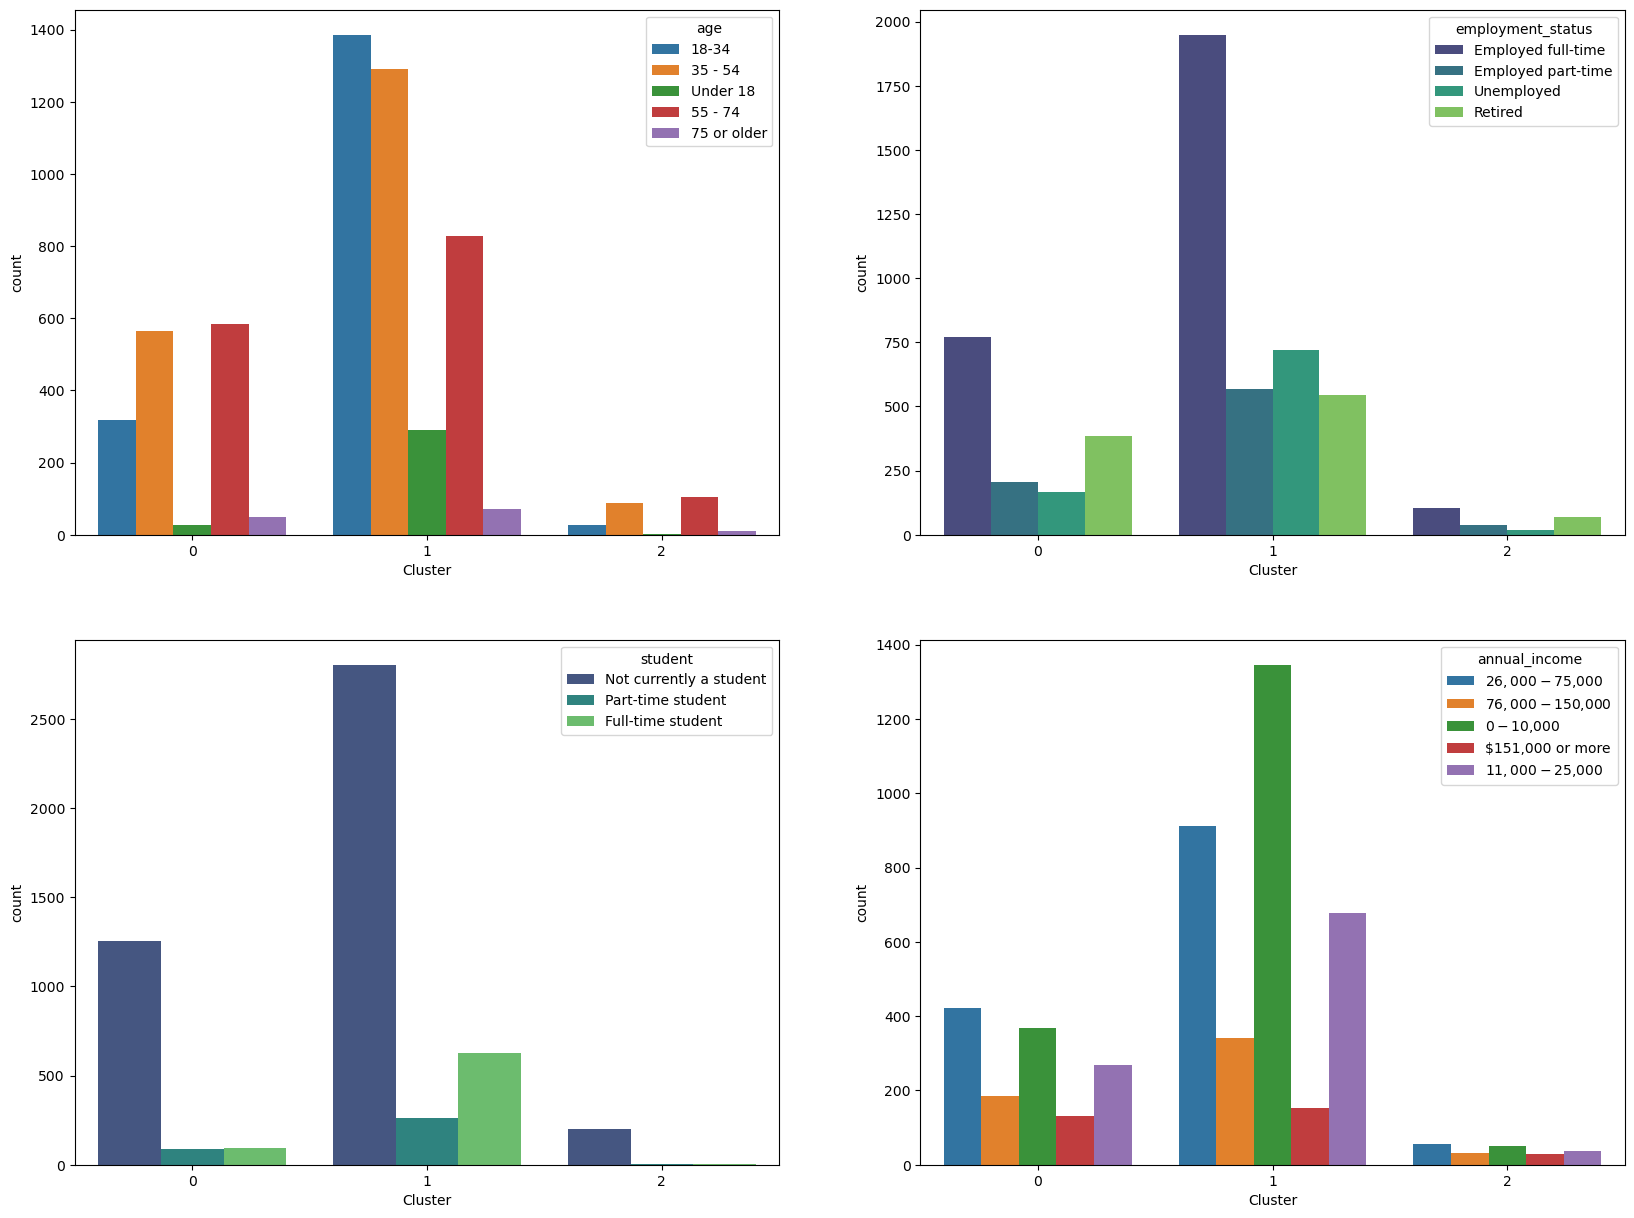

In [553]:
# Plot box plot of Demographic Features by Cluster
fig,axs=plt.subplots(2,2,figsize=(20,15))

sns.countplot(x='Cluster', hue="age",data=df, ax=axs[0,0])

sns.countplot( hue='employment_status', x="Cluster",data=df, ax=axs[0,1],palette='viridis')

sns.countplot( hue='student', x="Cluster",data=df, ax=axs[1,0],palette='viridis')

sns.countplot(hue='annual_income',x="Cluster", data=df, ax=axs[1,1])



### Comparison of app usage behaviors

<Axes: title={'center': 'Achievement Distribution by Cluster'}, xlabel='Cluster', ylabel='count'>

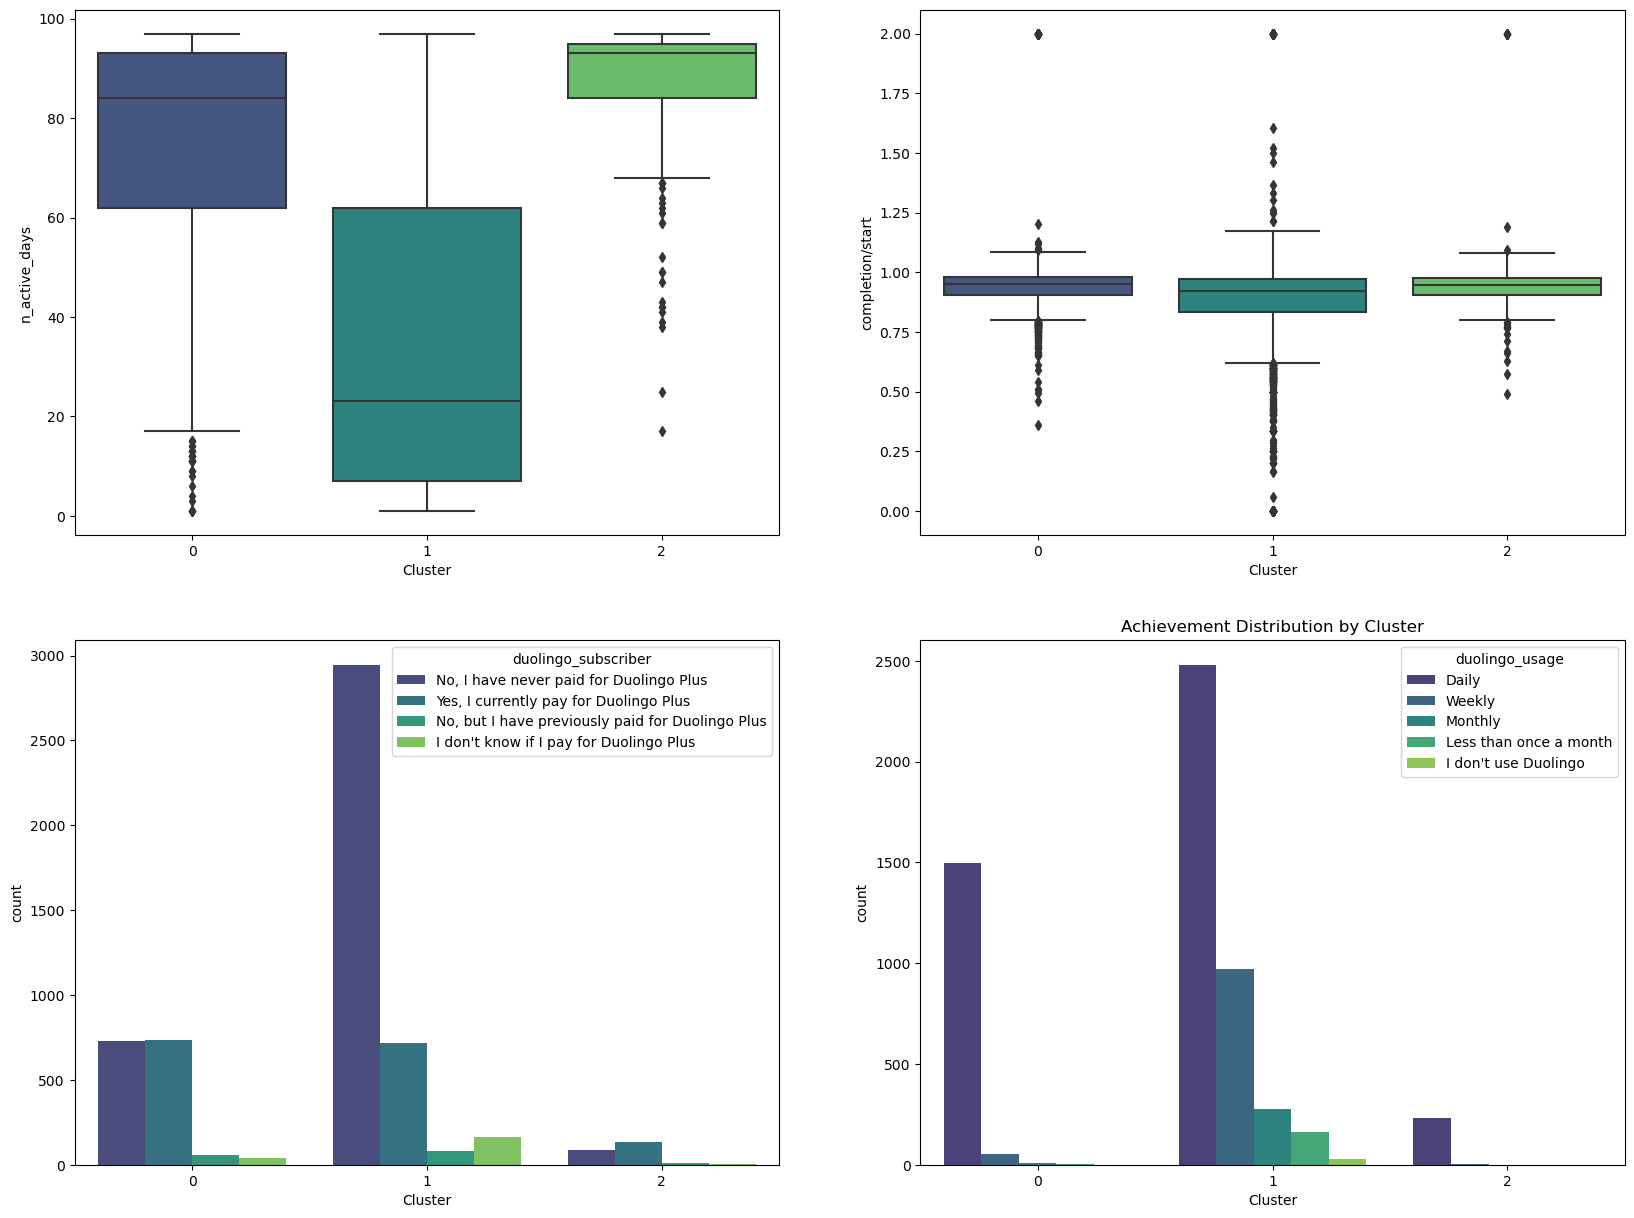

In [556]:
# Plot box plot of Demographic Features by Cluster
fig,axs=plt.subplots(2,2,figsize=(20,15))

sns.boxplot(x='Cluster', y="n_active_days", data=df, ax=axs[0,0],palette='viridis')
sns.boxplot(x='Cluster', y='completion/start', data=df_imputed, ax=axs[0,1],palette='viridis')

sns.countplot(x='Cluster', hue='duolingo_subscriber', data=df, ax=axs[1,0],palette='viridis')
sns.countplot(x='Cluster', hue='duolingo_usage', data=df, ax=axs[1,1],palette='viridis')



### Comparison of motivation and commitment

<Axes: xlabel='Cluster', ylabel='primary_language_commitment'>

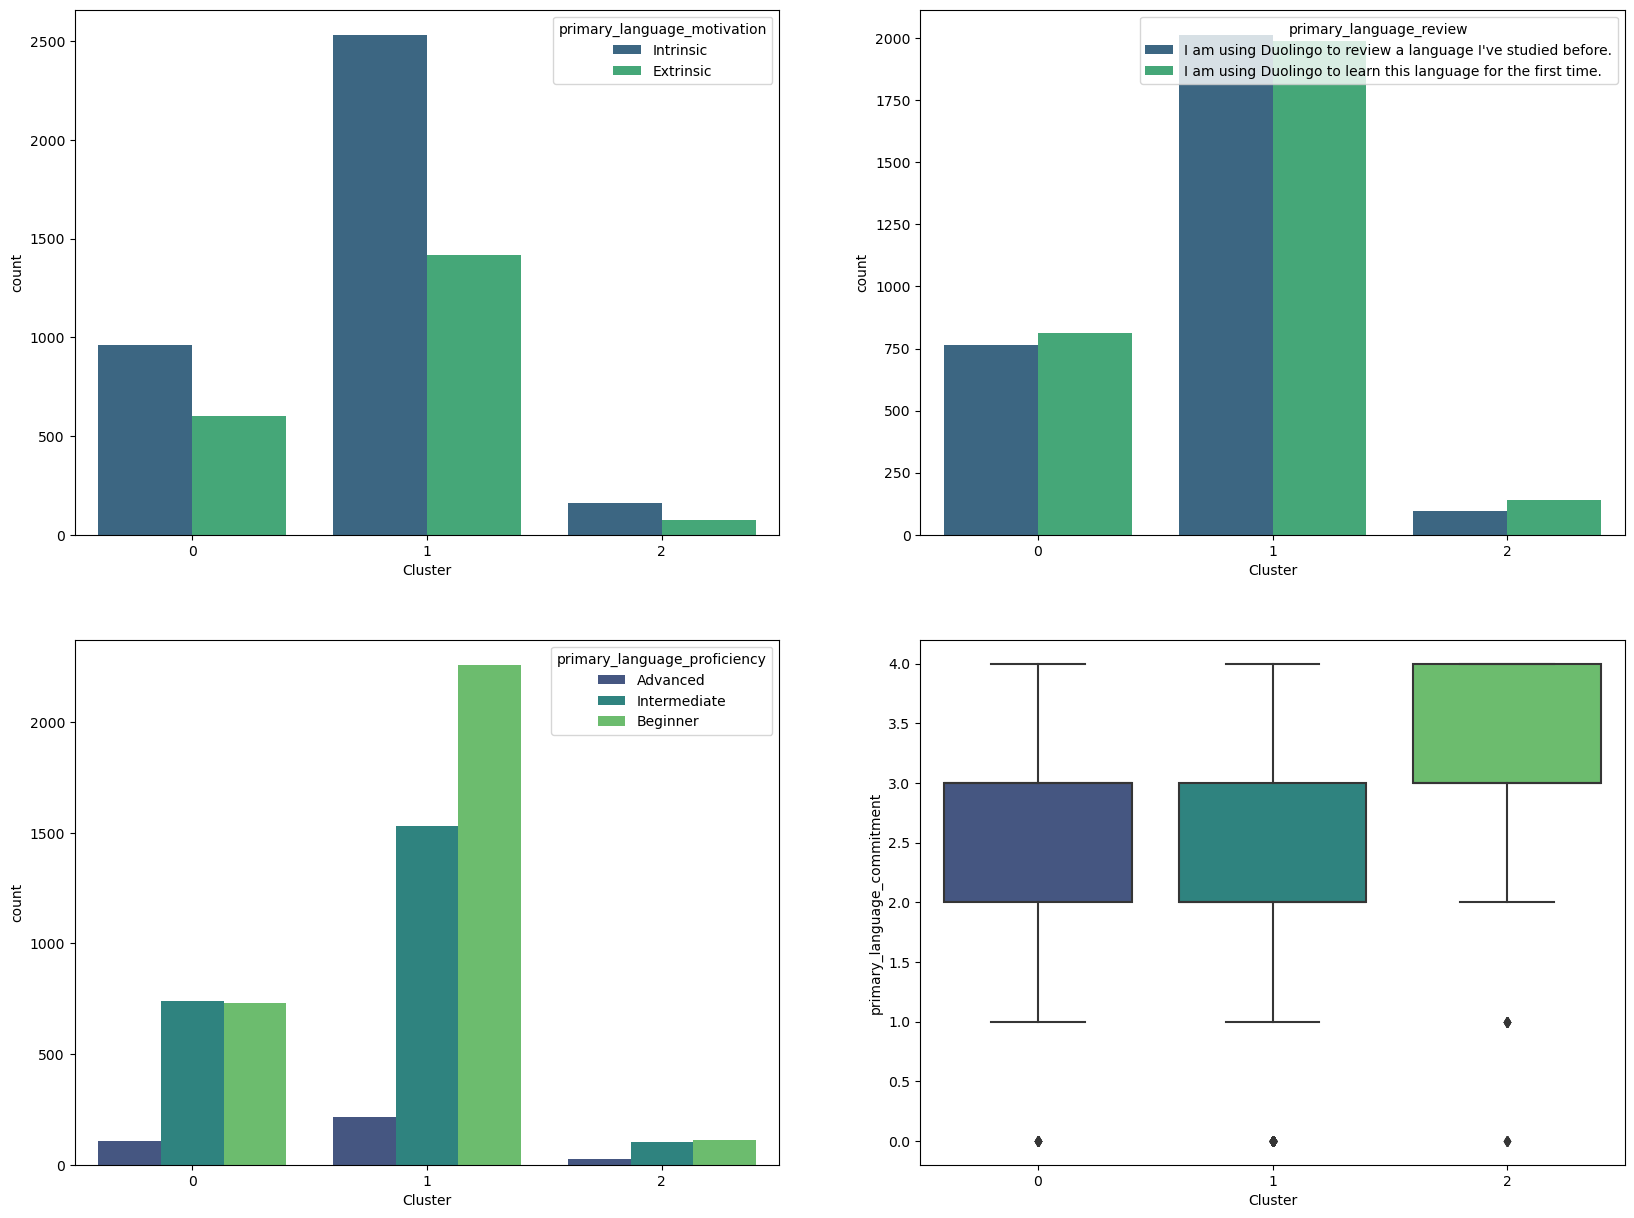

In [571]:
# Plot box plot of Usage Features by Cluster
fig,axs=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Cluster', hue='primary_language_motivation', data=new_data, ax=axs[0,0],palette='viridis')

sns.countplot(x='Cluster', hue='primary_language_review', data=df, ax=axs[0,1],palette='viridis')

sns.countplot(x='Cluster', hue='primary_language_proficiency', data=df, ax=axs[1,0],palette='viridis')

sns.boxplot(x='Cluster', y='primary_language_commitment', data=new_data, ax=axs[1,1],palette='viridis')



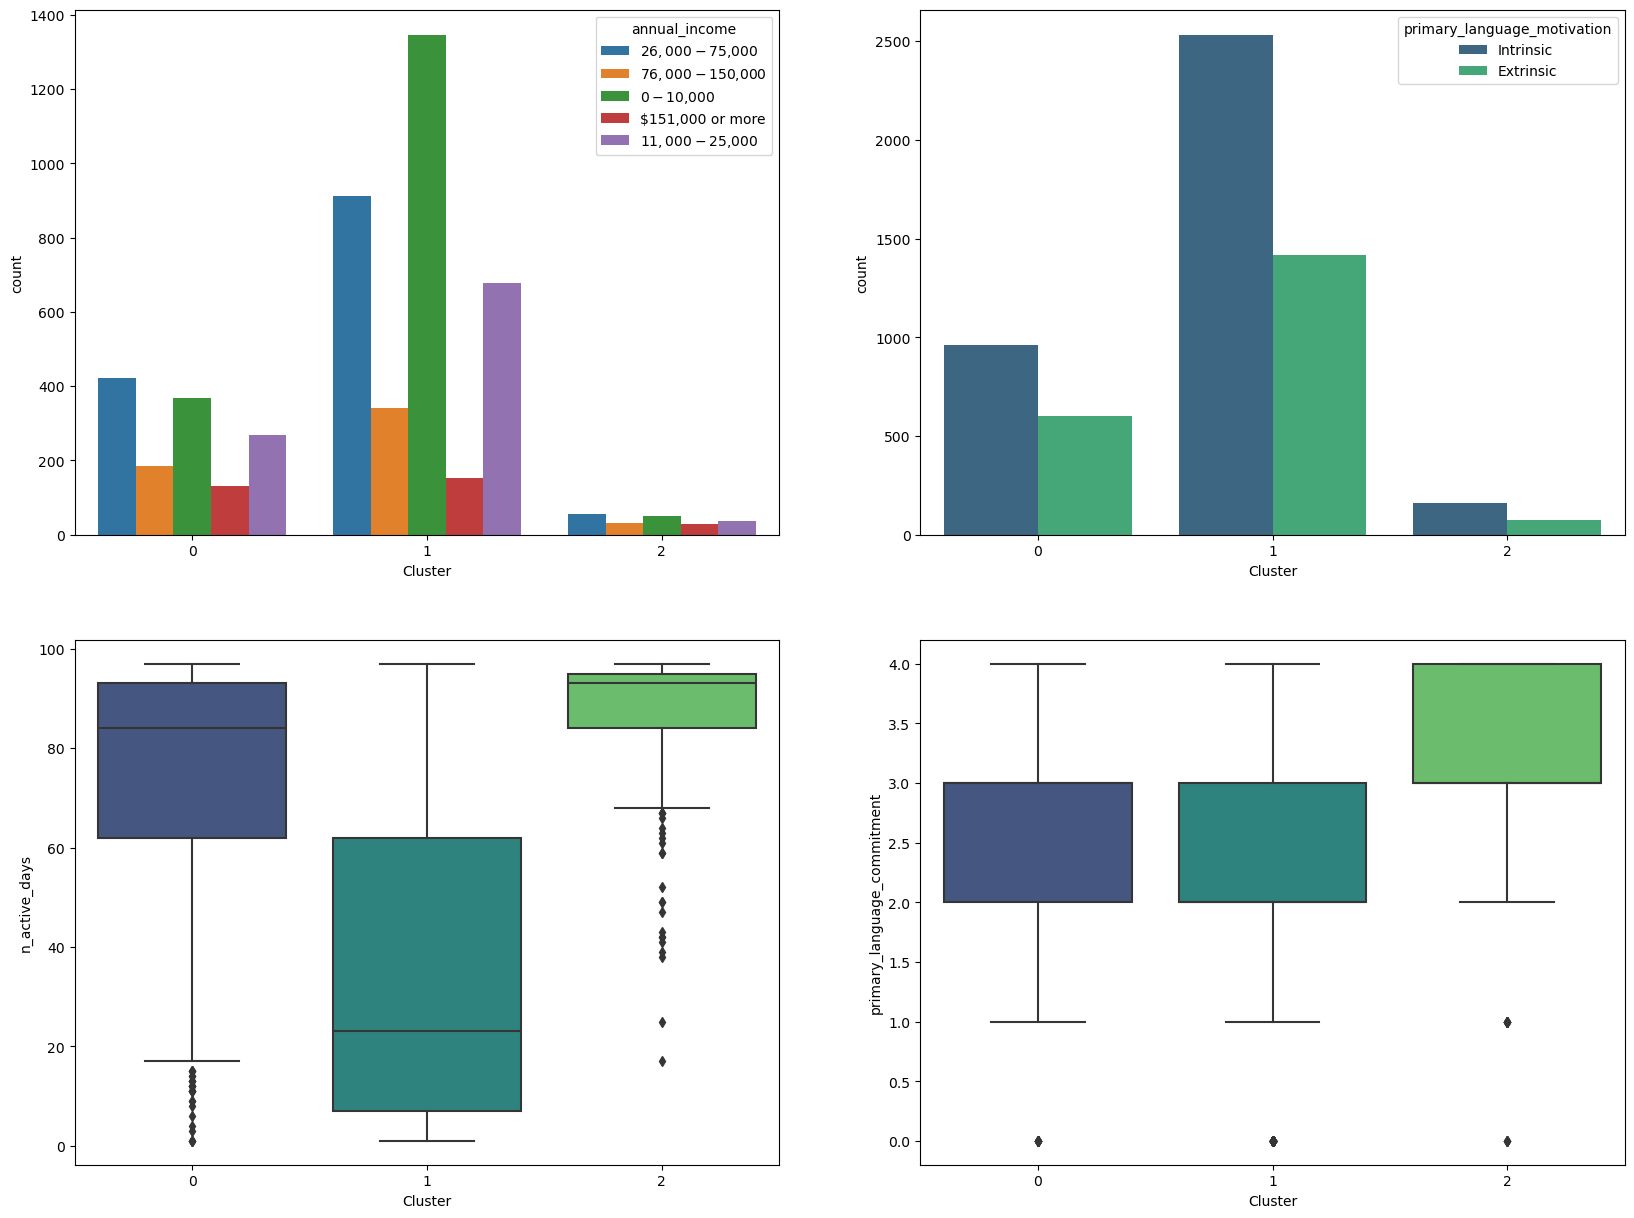

In [574]:
# generate the graph shown in the report
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Create countplots for each subplot
sns.countplot(hue='annual_income', x="Cluster", data=df, ax=axs[0, 0])
sns.countplot(x='Cluster', hue='primary_language_motivation', data=new_data, ax=axs[0,1],palette='viridis')
sns.boxplot(x='Cluster', y="n_active_days", data=df, ax=axs[1,0],palette='viridis')

sns.boxplot(x='Cluster', y='primary_language_commitment', data=new_data, ax=axs[1,1],palette='viridis')

# Save the entire figure as a JPG file
fig.savefig('cluster_analysis.jpg', format='jpg', dpi=300)
